In [9]:
import pandas as pd
import numpy as np
import sklearn
import random as rand
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from pandas.io.json import json_normalize

# Introduction

### What are we doing here?

You are in school because you either love to, or want to, work with data (hopefully both!). Over the last 10 years, the field of Data Science has matured quite a bit, and with it, the re-emergence of ML as a tool for solving some of the most challenging data problems with increased speed, accurracy and with entirely new capabilities.  

So, Abbass and your other professors are teaching you all about how to make those amazing tools do amazing things--Right? Great.

Well, at some point you'll graduate (seriously).  You'll also get a job (seriously). At that job, you'll do some amazing work eventually--you'll build a ML model that passes all of the tests, and you'll probably want to scale it to your whole user populaton.

So...What do you do?

That's where this workshop comes in.  There are a lot of ways to deploy and scale ML applications today (this is both a good and bad thing) but since it's all changing at breakneck pace, maybe school hasn't caught up yet.  So I want to show you a bit about the deployment paradigms that exist and give you a taste for where you might want to invest more time as you continue your ML/DS/AI Journey.

### First, we need to Give Credit where credit is due:

I drew inspiration, code and ideas from several, excellent articles written by some great people in the open data science community:

[Create a model to predict house prices using Python - Shreyas Raghavan](https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f)

[Deploy your Machine Learning model as an API in 5 minutes (with Docker and Flask) - Guissart](https://medium.com/dataswati-garage/deploy-your-machine-learning-model-as-api-in-5-minutes-with-docker-and-flask-8aa747b1263b)

[Create a complete Machine learning web application using React and Flask](https://towardsdatascience.com/create-a-complete-machine-learning-web-application-using-react-and-flask-859340bddb33)

[Tidymodels-tidypredict](https://tidymodels.github.io/tidypredict/)


[Deep Learning for Coders with Fastai and PyTorch: AI Applications Without a PhD](https://www.amazon.com/Deep-Learning-Coders-fastai-PyTorch/dp/1492045527) - Jeremy Howard & Sylvain Gugger


### Here are the main technologies and tools we'll use for the workshop
* [Scikit-learn](https://scikit-learn.org/stable/)
* [ipywidgets](https://ipywidgets.readthedocs.io/en/latest/)
* [Voila](https://github.com/voila-dashboards/voila)
* [Binder](https://mybinder.org/)
* [Docker](https://en.wikipedia.org/wiki/Docker_(software)) - We'll cover this at a high level.
* [Flask](https://en.wikipedia.org/wiki/Flask_(web_framework)) - We'll Cover this at a high livel.
* [React](https://en.wikipedia.org/wiki/React_(web_framework)) - We'll cover this at a high level.  


###  Some Deployment Paradigms

As I said, there are many different ways to push a ML model into production, but for simplicity's sake we'll cover just a few...

1. [Easy] Train in R/python and Run prediction directly in the database using tidypredict or something similar
2. **[Medium-Flexible] Send some executable model code to a web service which automatically builds and hosts it for reuse **  
3. [Medium-Inflexible] Wrap model inside of web app framework (i.e. Flask) and expose scoring function as a RESTful API endpoint
4. [Hard-Scalable] Build a highly responsive, highly scalable production AI product using Apache Kafka for datastreaming and MLFlow for MLOps (ML CI/CD)

We're going to spend the most time working through an example that falls into #2

### The Data:

The data is taken from this [Kaggle](https://www.kaggle.com/shivachandel/kc-house-data) page. 

Online property companies offer valuations of houses using machine learning techniques. The aim of this report is to predict the house sales in King County, Washington State, USA using Multiple Linear Regression (MLR). The dataset consisted of historic data of houses sold between May 2014 to May 2015. We will predict the sales of houses in King County with an accuracy of at least 75-80% and understand which factors are responsible for higher property value - $650K and above.”

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset was obtained from Kaggle. **This data was published/released under CC0**: Public Domain. Unfortunately, the user has not indicated the source of the data. Please find the citation and database description in the Glossary and Bibliography. The dataset consisted of 21 variables and 21613 observations.

In [10]:
data = pd.read_csv("kc_house_data.csv")

In [11]:
data.count()

id               21613
date             21613
price            21613
bedrooms         21613
bathrooms        21613
sqft_living      21613
sqft_lot         21613
floors           21613
waterfront       21613
view             21613
condition        21613
grade            21613
sqft_above       21613
sqft_basement    21613
yr_built         21613
yr_renovated     21613
zipcode          21613
lat              21613
long             21613
sqft_living15    21613
sqft_lot15       21613
dtype: int64

In [12]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Project Setup

We'll need a few things to make this work: 

#### 1. A data set (see above)

 We are going to with on a dataset which consists information about the location of the house , price and other aspects such as square feet etc. The goal is to make a model which can give us a good prediction on the price of the house based on these attributes.  Before going too much farther, we should also discuss our success criteria--that is what is a good enough outcome for use of the model? [Insert discussion about AI product development] We can’t actually define “good accuracy” for this problem, but anything above 85% is good. Our aim on this dataset is to achieve an accuracy score of 85%+
 
Let's also do some prep (handle dates, remove index, extract and remove target variable (price) for training and reduce fearture space from 19 to 6

In [13]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'],axis=1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10, random_state=2)

In [15]:
col_imp = ["grade", "lat", "long", "sqft_living", "waterfront", "yr_built"]

#### 2. An acceptable model which does something interesting (here: predicts home price from house demographics)

 * Walk through training of GBT Regressor

In [16]:
clf = GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,
          learning_rate=0.1, loss='ls')

In [17]:
clf.fit(train1[col_imp], labels)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [18]:
clf.score(x_test[col_imp],y_test)

0.9553842738696576

#### 3. A way to encode the model for reuse in a serving environment

* Create a function that takes a dictionary value representation for a home and a model returns a  price prediction

In [19]:
def predict(dict_values, col_imp=col_imp, clf=clf):
    x = np.array([float(dict_values[col]) for col in col_imp])
    x = x.reshape(1,-1)
    y_pred = clf.predict(x)[0]
    return y_pred

* Export some test data to a [JSON](https://en.wikipedia.org/wiki/JSON) object so they can be easily handled by the an inference API, UI or service that we'll setup later
* You can see from the output that the JSON format is adhered to and, if you want, compare row 20 of the dataframe to what's returned by the column import performed here

In [20]:
x_test[col_imp].iloc[20].T.to_json(force_ascii = False)

'{"grade":5.0,"lat":47.5138,"long":-122.364,"sqft_living":620.0,"waterfront":0.0,"yr_built":1939.0}'

* Ok, we can assign the entire JSON object to a python variable, while also transposing it so that it's easier to read.

In [21]:
x_test_json = x_test[col_imp].iloc[20].T.replace('},{', '} {')

* Let's check out the result, with some nice automatic formatting applied!

In [22]:
x_test_json

grade             5.0000
lat              47.5138
long           -122.3640
sqft_living     620.0000
waterfront        0.0000
yr_built       1939.0000
Name: 12418, dtype: float64

* Now, let's run our predict function (which expects a JSON object) on x_test_json

In [23]:
predict(x_test_json)

179378.01971649803

That's cool!  But wait--we were're talking about production, here.  We don't just want to run the model in a notebook, we want anyone to be able to find home prices--no matter where they are. Essentially we want to run the same model inference (prediction task) on the internet!  Well, first...we need a more friendly interface

#### 3. Building a Web-friendly UI 

Luckily for you (none of this existed when I started) a lot of great work has been done to itegrate common UI tools with the Jupyter environment.  

From the ipywidgets [documentation](https://ipywidgets.readthedocs.io/en/latest/developer_docs.html#scope-of-ipywidgets): 

> `ipywidgets` is a framework to provide eventful python objects that have a representation in the browser...This requires two components:
1. The framework for widget interactions between the widgets represented in the Python kernel and the (javascript) representation of the widgets in the browser.
2. A basic, lightweight set of form controls that use this framework, based on standard HTML form controls. These included controls include a text area, text box, select and multiselect controls, checkbox, etc. A few more advanced controls that are very popular are also included, such as a slider and basic tab panels.

 
##### What are widgets?
Widgets are eventful python objects that have a representation in the browser, often as a control like a slider, textbox, etc.

##### What can they be used for?
You can use widgets to build interactive GUIs for your notebooks.
You can also use widgets to synchronize stateful and stateless information between Python and JavaScript.

To use the widget framework, you need to import `ipywidgets`

We're also going to want to add some dynamic display elements, so we'll need a component of IPython's display module called `clear_output`

In [24]:
import ipywidgets as widgets
from IPython.display import clear_output

Now, let's create some buttons for our users.  We'll need two controls: 
1. Something that selects a (random) row from the dataset 
2. Another that computes a predicted price from the data in that row.

We also need to setup the layout for the output and arrange the boxes and styles.

In [34]:
score_btn = widgets.Button(description='Predict Price', 
                           button_style='primary',
                           layout = widgets.Layout(width='auto', height='40px'))
btn_select_random = widgets.Button(description = 'Select Random House', 
                                   layout = widgets.Layout(width='auto', height='auto'))
out_select = widgets.Output(layout={'border': '1px solid black'})
out_score = widgets.Output(layout={'border': '1px solid black'})
widgets.Layout(width = 'auto')

Layout(width='auto')

Ok, now that we've got everything setup and defined, we need a function for each button that actuall..Well does something.  First let's take care of selecting that random row from the KC dataset.  This function does a few things:

1. Like above picks a random row from the dataset, transposes it to the correct JSON format and then assignes it to the variable **x_test_json**
2. Clears the output of the UI box
3. Prints out the selected data

**note:** *Normally I wouldn't **ever** use a global variable like this, but when building simple UIs and in other contexts like video game programming where you essentially have a event listening service to interact with, passing data through arguments to functions/return statements can be a bit overkill

In [35]:
def btn_select_random_eventhandler(obj):
    with out_select:
        global x_test_json
        x_test_json = x_test[col_imp].iloc[rand.randint(1,2100)].T.replace('},{', '} {')
        clear_output()
        print(x_test_json)
    with out_score:
        clear_output()

We'll make a similar function for the scoring button, but the most important part is calling the `predict` function from earlier on the selected variable: **x_test_json**

In [36]:
def btn_score_eventhandler(obj):
    with out_score:
        clear_output()
        print("Predicted Price: $",predict(x_test_json) )

Now let's display (and run) the simple UI by arranging the objects in the correct order and then calling the event handling functions from above!

In [39]:
display(widgets.VBox([btn_select_random,out_select,score_btn,out_score]))

btn_select_random.on_click(btn_select_random_eventhandler)
score_btn.on_click(btn_score_eventhandler)

Ok perfect!  Now that we have a UI, we can start thinking about deployment--seriously. Now Jupyter is a great format for experimentation and testing, but in many ways is _Not_ good for code execution and serious development.  

As such we need to use some tools to get around that.  The first is a service that turns notebooks into standalone web applications, called **Voila!**.  

In thier own words:

> Unlike the usual HTML-converted notebooks, each user connecting to the Voilà tornado application gets a dedicated Jupyter kernel which can execute the callbacks to changes in Jupyter interactive widgets.

To do this, run the following code (one time!) in your notebook environment.

```pip install voila
jupyter serverextension enable --sys-prefix voila 
```

Next, we can test this out by replacing the word "notebooks" in your URL bar with "voila/render/"

Cool, right?

Finally we want _anyone_ to be able to access our awesome ML app, not just folks that are local to our computing environment...So we need a web service to host our web application.  It'll need some compute, memory, some basic software and a bunch of networking instructions.  Since it's 2020, you don't have to build that in your garage!  

For simple applications like this that don't need high performance hardware or to be responsive to a lot of traffic, it's even better--we can just use Binder.  Binder _litterally_ turns git repos into remote cloud environments.

Here's some info from https://mybinder.readthedocs.io/en/latest/: 

> Binder allows you to create custom computing environments that can be shared and used by many remote users. It is powered by [BinderHub](https://github.com/jupyterhub/binderhub), which is an open-source tool that deploys the Binder service in the cloud. One-such deployment lives at [mybinder.org](https://mybinder.org/), and is free to use. For more information about the mybinder.org deployment and the team that runs it, see [About mybinder.org](https://mybinder.readthedocs.io/en/latest/about/about.html).

Great--let's do this.  We'll want to clean up our notebook a little bit so that we can keep users focused on the real functionality that we want.  To save time, I went ahead and created `HousePriceApp.ipynb` which just is a cleaned up version of what we built above.

Also we need to tell Binder what software to install! so the `requirement.txt` file includes the following:

``` 
voila
numpy
sklearn
pandas
ipywidgets==7.5.1
```

To send our ML application to the web to be enjoyed by all here's what you do:

1. Visit the Binder landing page
2. Enter https://github.com/stbiadmin/USCProdML into the first field 
3. Enter the word "main" into the 2nd field.
4. Change the "file" dropdown in the third field to "URL"
5. Enter voila/render/HousePriceApp.ipynb into the third field 
6. Click "launch"

It should look something like the below

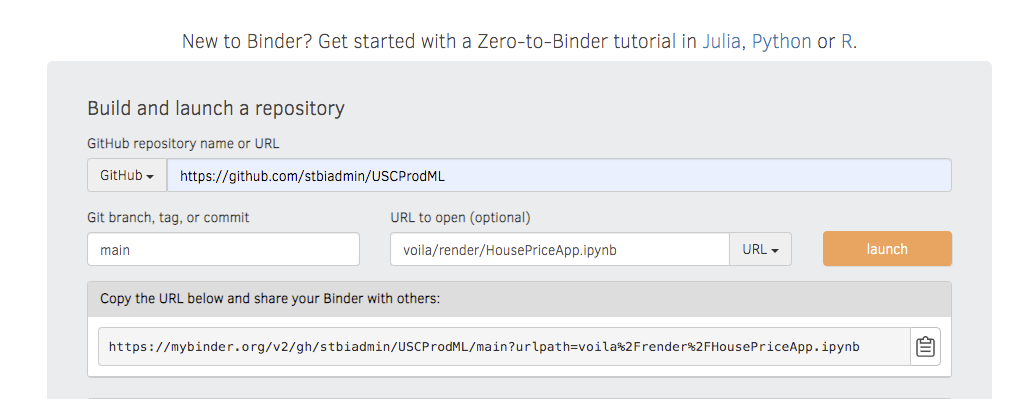

You'll see something like this for a while: 

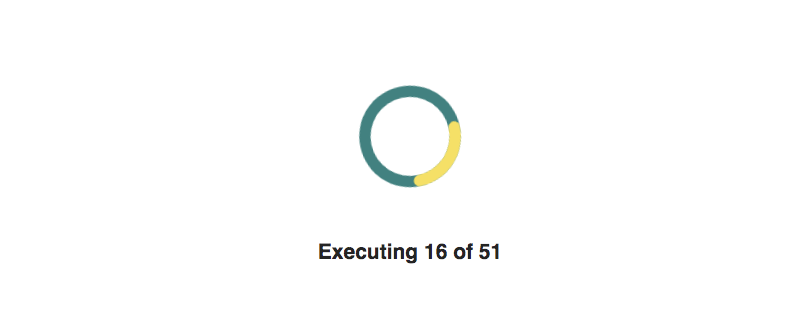

## Appendix

 * Walk through training of RF Regressor?
 * Compare R^2 scores to select one?

In [69]:
x_test[col_imp].iloc[rand.randint(1,2162)]

grade            11.0000
lat              47.5696
long           -122.0900
sqft_living    5270.0000
waterfront        1.0000
yr_built       1979.0000
Name: 13710, dtype: float64

In [ ]:
x_test[col_imp].iloc[rand.randint(1,2162)].T.to_json("../to_predict_json.json")